In [4]:
# 기본라이브러리 import
from google.colab import drive
import random, os, json, pickle
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import tensorflow as tf

import warnings
warnings.filterwarnings(action='ignore')

### 보스턴 집값데이터를 csv파일에서 로드

In [5]:
# 구글 드라이브 mount
drive.mount('/content/gdrive')

# 데이터 파일 위치
colab_path = '/content/gdrive/My Drive/Colab Notebooks/machinelearning/'
# 데이터 파일 로드

boston_df = pd.read_csv(colab_path+'boston.csv')
boston_df

Mounted at /content/gdrive


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### 보스턴 집값데이터를 scikit learn에서 `fetch_openml()` 함수로 로드

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

# OpenML에서 보스턴 집값 데이터셋 로드
boston = fetch_openml(name="boston", version=1, as_frame=True)

# 데이터를 pandas DataFrame으로 변환
df = boston.frame

# 데이터 확인
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [ ]:
boston.target


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### 보스턴 집값데이터를 UC Irvine의 데이터베이스에서 로드

In [6]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

df_data = pd.read_csv(data_url, sep='\s+', header = None) # csv 데이터 로드

df = pd.DataFrame(df_data)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
from pandas import Series, DataFrame

raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
'age': [42, 52, 36, 24, 73],
'city': ['San Francisco', 'Baltimore', 'Miami', 'Douglas', 'Boston']}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'city'])

df


,first_name,last_name,age,city
0,Jason,Miller,42,San Francisco
1,Molly,Jacobson,52,Baltimore
2,Tina,Ali,36,Miami
3,Jake,Milner,24,Douglas
4,Amy,Cooze,73,Boston


데이터 생성시, 열 이름을 한정하면 해당 열만 추출

In [8]:
DataFrame(raw_data, columns = ["age", "city"])

,age,city
0,42,San Francisco
1,52,Baltimore
2,36,Miami
3,24,Douglas
4,73,Boston


데이터가 존재하지 않는 열을 추가하면 해당 열에는 NaN 값들 추가

In [9]:
DataFrame(raw_data, columns = ["first_name","last_name","age", "city", "debt"])


,first_name,last_name,age,city,debt
0,Jason,Miller,42,San Francisco,NaN
1,Molly,Jacobson,52,Baltimore,NaN
2,Tina,Ali,36,Miami,NaN
3,Jake,Milner,24,Douglas,NaN
4,Amy,Cooze,73,Boston,NaN


(colab_path+'boston.csv')


In [10]:
!pip install openpyxl

In [11]:
import pandas as pd  # pandas 모듈 호출
import numpy as np   # numpy 모듈 호출
df = pd.read_excel(colab_path+'excel-comp-data.xlsx')
df

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000


In [12]:
df.head(5)


,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


In [13]:
df.head(3).T


,0,1,2
account,211829,320563,648336
name,"Kerluke, Koepp and Hilpert",Walter-Trantow,"Bashirian, Kunde and Price"
street,34456 Sean Highway,1311 Alvis Tunnel,62184 Schamberger Underpass Apt. 231
city,New Jaycob,Port Khadijah,New Lilianland
state,Texas,NorthCarolina,Iowa
postal-code,28752,38365,76517
Jan,10000,95000,91000
Feb,62000,45000,120000
Mar,35000,35000,35000


In [14]:
df[["account", "street", "state"]].head(3)


,account,street,state
0,211829,34456 Sean Highway,Texas
1,320563,1311 Alvis Tunnel,NorthCarolina
2,648336,62184 Schamberger Underpass Apt. 231,Iowa


인덱스 번호로 호출
<br>
기존의 리스트나 넘파이 배열(ndarray) 인덱싱과 동일


In [15]:
df[:3] # df.head(3)


,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000


인덱스를 0부터 시작하는 숫자 아닌 다른 값으로 변경 가능

In [16]:
df.index = df["account"]
del df["account"]
df.head()

,name,street,city,state,postal-code,Jan,Feb,Mar
account,,,,,,,,
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


loc 함수 : 인덱스 이름과 열 이름으로 데이터 추출

인덱스 대신 특정 account 번호를 넣어 해당 번호의 값을 나타냄

In [17]:
df.loc[[211829,320563],["name","street"]]


,name,street
account,,
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway
320563,Walter-Trantow,1311 Alvis Tunnel


인덱스 번호가 항상 정렬되어 있지 않아 처음 저장된 순서대로 출력



In [18]:
df.loc[205217:,["name","street"]]


,name,street
account,,
205217,Kovacek-Johnston,91971 Cronin Vista Suite 601
209744,Champlin-Morar,26739 Grant Lock
212303,Gerhold-Maggio,366 Maggio Grove Apt. 998
214098,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078
231907,Hahn-Moore,18115 Olivine Throughway
242368,"Frami, Anderson and Donnelly",182 Bertie Road
268755,Walsh-Haley,2624 Beatty Parkways
273274,McDermott PLC,8917 Bergstrom Meadow


`iloc` 함수 :  인덱스 번호로만 데이터 호출

- `index location` 의 약자



In [19]:
df.iloc[:10, :3]


,name,street,city
account,,,
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob
320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah
648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland
109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh
121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester
132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh
145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton
205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville
209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton


`loc`, `iloc` 함수를 사용한 데이터 추출

- `reset_index` 함수로 새로운 인덱스 할당된 객체 생성

- 인덱스 이름이나 인덱스 중 편한 방법을 사용


In [20]:
df_new = df.reset_index()
df_new


,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000


drop 함수 : 특정 열이나 행을 삭제한 객체를 반환


In [21]:
df_dropped_row = df_new.drop(1).head()


In [22]:
df_new

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000


In [23]:
df_dropped_row

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000


index가 1인 행 제거

In [24]:
df_drop = df_new.drop(1)
df_drop

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000
10,214098,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078,Rosaberg,Tenessee,47743,45000,120000,55000


`inplace=True`: DataFrame을 수정한 결과를 반환하지 않고, 원본 데이터프레임을 바로 수정

In [25]:
df_new.drop(1, inplace=True)

In [26]:
df_new

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000
10,214098,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078,Rosaberg,Tenessee,47743,45000,120000,55000


In [27]:
df_new.drop("account", axis=1) # account 열 제거
df_new.drop(["account", "name"], axis=1) # account, name 열 제거

,street,city,state,postal-code,Jan,Feb,Mar
0,34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000
10,649 Cierra Forks Apt. 078,Rosaberg,Tenessee,47743,45000,120000,55000


### 그룹별 집계의 개념

- 그룹별 집계(groupby) : 데이터로부터 동일한 객체를 가진 데이터만 따로 뽑아 기술통계 데이터를 추출

  - 엑셀의 피봇테이블(pivot table) 기능과 비슷
  - 예) A반 수학 점수의 원본 데이터(raw data)를 가지고 있을 때 해당 데이터에서
    - 같은 성별을 가진 학생들의 평균 점수를 구하거나
    - 50점 이상을 받은 학생의 수를 구함

- groupby 명령어는 분할→적용→결합 과정을 거침
  - 분할(split) : 같은 종류의 데이터끼리 나누는 기능
  - 적용(apply) : 데이터 블록마다 sum, count, mean 등 연산 적용
  - 결합(combine) : 연산 함수가 적용된 각 블록들을 합침


In [75]:
import pandas as pd # pandas 모듈 호출
import numpy as np # numpy 모듈 호출

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
            'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
            'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
            'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}

df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


그룹별 집계 `groupby()`

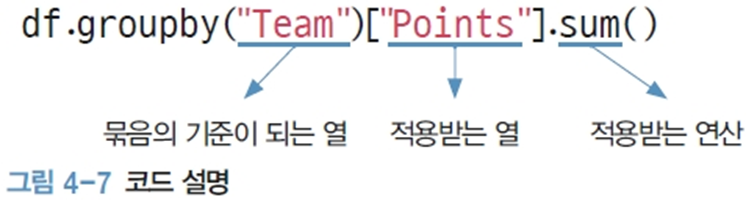

In [79]:
df.groupby("Team")["Points"].sum()

,Points
Team,
Devils,1536
Kings,3097
Riders,3049
Royals,1505


한 개 이상의 열을 기준으로 그룹별 집계를 실행
- 리스트를 사용하여 여러 개의 열 이름을 기준으로 넣으면 여러 열이 키 값이 되어 결과 출력
- 계층적 인덱스(hierarchical index) 형태


In [80]:
multi_groupby = df.groupby(["Team", "Year"])["Points"].sum()
multi_groupby

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
Name: Points, dtype: int64

한 개 이상의 열로 그룹별 집계 수행하면 여러 열이 모두 인덱스로 반환됨

In [81]:
multi_groupby.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2015),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015)],
           names=['Team', 'Year'])

In [66]:
multi_groupby["Devils":"Kings"]

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Name: Points, dtype: int64

unstack() : 하위 인덱스를 열로 변환하여 계층적 인덱스를 피벗 테이블과 유사한 형식으로 변환



In [82]:
multi_groupby.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,812.0,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN


- `swaplevel` 함수로 인덱스 간 레벨을 변경
- `sort_index` 함수로 첫 번째 인덱스를 기준으로 데이터 재정렬


In [83]:
multi_groupby.swaplevel().sort_index()

Year  Team  
2014  Devils    863
      Kings     741
      Riders    876
      Royals    701
2015  Devils    673
      Kings     812
      Riders    789
      Royals    804
2016  Kings     756
      Riders    694
2017  Kings     788
      Riders    690
Name: Points, dtype: int64

- 그룹화된(grouped) 상태 : 분할→적용→결합 중에서
분할까지만 이루어진 상태
- get_group 함수 : 해당 키 값을 기준으로 분할된 데이터프레임 객체를 확인


In [76]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [84]:
grouped = df.groupby("Team")
grouped.get_group("Riders")

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


In [78]:
for grp in grouped:
  print(grp)

('Devils',      Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673)
('Kings',     Team  Rank  Year  Points
4  Kings     3  2014     741
5  Kings     4  2015     812
6  Kings     1  2016     756
7  Kings     1  2017     788)
('Riders',       Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690)
('Royals',       Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804)


In [70]:
grouped.get_group("Kings")

,Team,Rank,Year,Points
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788


* **집계(aggregation)** : 요약된 통계 정보를 추출
**agg 함수** : `min`, `max`, 넘파이 `mean`, `sum` 등 기존 함수 그대로 적용


In [85]:
grouped.agg(min)

,Rank,Year,Points
Team,,,
Devils,2,2014,673
Kings,1,2014,741
Riders,1,2014,690
Royals,1,2014,701


In [38]:
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


- 변환(transformation) : 해당 정보를 변환
- 키 값별로 요약된 정보가 아닌 개별 데이터 변환 지원
- 적용 시점에서는 그룹화된 상태의 값으로 적용


그룹화된 데이터에 대해 각 그룹의 최대값을 원래 DataFrame의 크기와 동일한 형태로 반환하는 데 사용

In [86]:
grouped.transform(max)

,Rank,Year,Points
0,2,2017,876
1,2,2017,876
2,3,2015,863
3,3,2015,863
4,4,2017,812
5,4,2017,812
6,4,2017,812
7,4,2017,812
8,2,2017,876
9,4,2015,804


In [87]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [88]:
score = lambda x: (x - x.mean()) / x.std()
grouped.transform(score)


,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,0.500000,-1.161895,-1.042333
5,1.166667,-0.387298,1.183401
6,-0.833333,0.387298,-0.572108
7,-0.833333,1.161895,0.431040
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


필터(filter) : 특정 조건으로 데이터를 검색
주로 filter 함수 사용


- x는 분할된 상태에서 각각의 그룹화된 데이터프레임
- lambda 함수는 분할된 데이터프레임 전체를 매개변수로 받음
- Points 열을 추출


In [89]:
df.groupby('Team').filter(lambda x: len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [91]:
df.groupby('Team').filter(lambda x: x["Points"].max() > 850)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
8,Riders,2,2016,694
11,Riders,2,2017,690


SQL에서는 조인(join)이라는 표현을 더 많이 사용

- **내부 조인(inner join)** : 키 값을 기준으로 두 테이블에 모두 존재하는 키 값의 행끼리 병합

- **완전 조인(full join, outer join)** : 두 개의 테이블에서 각각의 행을 병합
두 테이블에서 동일한 키 값을 가진 행은 통합하고,
두 테이블 중 하나라도 키 값이 존재하지 않는다면 존재하는 쪽의 데이터만 남겨둠

- **왼쪽 조인(left join)** : 왼쪽 테이블의 값을 기준으로 같은 키 값을 소유하고 있는 행을 병합하고, 오른쪽 테이블에 해당 키 값이 존재하지 않는다면 해당 행은 삭제

- **오른쪽 조인(right join)** : 오른쪽 테이블의 값을 기준으로 같은 키 값을 소유하고 있는 행을 병합하고, 왼쪽 테이블에 해당 키 값이 존재하지 않는다면 해당 행은 삭제


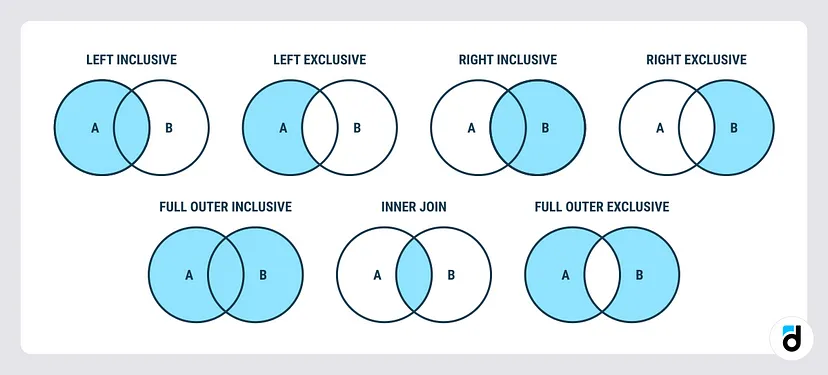

In [95]:
import pandas as pd # pandas 모듈 호출
raw_data = {
'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
'test_score': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

df_left = pd.DataFrame(raw_data, columns = ['subject_id', 'test_score'])
df_left

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [96]:
raw_data = {'subject_id': ['4', '5', '6', '7', '8'],
            'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
            'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

df_right = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_right

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


**내부 조인(inner join)** : 가장 기본적인 조인

- 집합으로 보면 양쪽의 교집합 데이터를 통합

- subject_id를 기준으로 내부 조인을 수행
- 키 값 subject_id 열의 값이 두 테이블 모두 존재해야 병합됨
- `left`, `right` 매개변수에 각 위치에 해당하는 데이터프레임 객체를 입력
- `how`에 조인 방법 “inner”를 문자열 타입으로 입력
- `on`에 병합의 기준이 되는 열 이름을 입력


In [97]:
pd.merge(left=df_left, right=df_right, how="inner", on='subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


- **왼쪽 조인** : 왼쪽 테이블을 기준으로 데이터를 병합
- 오른쪽 테이블에 왼쪽 테이블에 있는 키 값이 존재하지 않는다면 NaN으로 출력


In [98]:
pd.merge(df_left, df_right, on='subject_id', how='left')

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


**오른쪽 조인** : 오른쪽 테이블 기준으로 데이터를 병합


In [99]:
pd.merge(df_left, df_right, on='subject_id', how='right')

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


**Outer Join(Full Join)**
- 두 테이블의 합집합을 의미
- 양쪽에 같은 키 값이 있는 데이터는 합치고 나머지는 NaN

In [100]:
pd.merge(df_left, df_right, on='subject_id', how='outer')


,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


In [101]:
df_left.index = df_left.subject_id
del df_left["subject_id"]
df_right.index = df_right.subject_id
del df_right["subject_id"]

pd.merge(df_left, df_right, on='subject_id', how='inner')

,test_score,first_name,last_name
subject_id,,,
4,61,Billy,Bonder
5,16,Brian,Black
7,14,Bryce,Brice
8,15,Betty,Btisan


In [102]:
import os
filenames = [os.path.join(colab_path, filename)
             for filename in os.listdir(colab_path) if "sales" in filename]
print(filenames)

['/content/gdrive/My Drive/Colab Notebooks/machinelearning/sales-jan-2014.xlsx', '/content/gdrive/My Drive/Colab Notebooks/machinelearning/sales-feb-2014.xlsx', '/content/gdrive/My Drive/Colab Notebooks/machinelearning/sales-mar-2014.xlsx']


In [103]:
!pip install --user --upgrade openpyxl

In [55]:
df_list = [pd.read_excel(filename, engine="openpyxl") for filename in filenames]
for df in df_list:
    print(type(df), len(df))

<class 'pandas.core.frame.DataFrame'> 134
<class 'pandas.core.frame.DataFrame'> 108
<class 'pandas.core.frame.DataFrame'> 142


### **연결**
**연결(concatenate)** : 두 테이블을 그대로 붙임
- 데이터의 스키마가 동일할 때 그대로 연결
- 주로 세로로 데이터를 연결
  - `concat` 함수 : 두 개의 서로 다른 테이블을 하나로 합침
  - `append` 함수 : 기존 테이블 하나에 다른 테이블을 붙임


In [104]:
df = pd.concat(df_list, axis=0)
print(len(df)) # 384
df.reset_index(drop=True)

384


,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
...,...,...,...,...,...,...,...
379,737550,"Fritsch, Russel and Anderson",B1-65551,12,56.24,674.88,2014-03-31 08:43:24
380,642753,Pollich LLC,S1-93683,21,92.57,1943.97,2014-03-31 11:37:34
381,412290,Jerde-Hilpert,B1-20000,30,22.38,671.40,2014-03-31 21:41:31
382,307599,"Kassulke, Ondricka and Metz",S2-16558,46,56.04,2577.84,2014-03-31 22:11:22


In [106]:
df_1, df_2, df_3 = [pd.read_excel(filename, engine="openpyxl") for
filename in filenames]
df = pd.concat([df_1,df_2,df_3], axis=0)
print(len(df)) # 384
df.reset_index(drop=True)

384


,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
...,...,...,...,...,...,...,...
379,737550,"Fritsch, Russel and Anderson",B1-65551,12,56.24,674.88,2014-03-31 08:43:24
380,642753,Pollich LLC,S1-93683,21,92.57,1943.97,2014-03-31 11:37:34
381,412290,Jerde-Hilpert,B1-20000,30,22.38,671.40,2014-03-31 21:41:31
382,307599,"Kassulke, Ondricka and Metz",S2-16558,46,56.04,2577.84,2014-03-31 22:11:22
